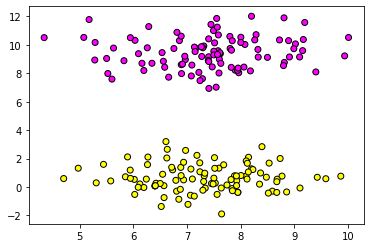

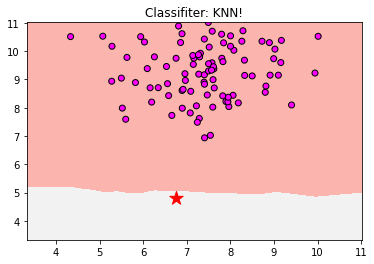





代码运行结果：
新数据点分类是： [1]






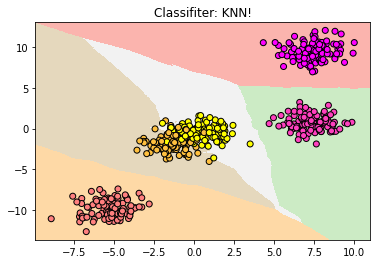

In [1]:
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
import numpy as np

# 生成样本数据为200，分类为2的数据
data = make_blobs(n_samples=200, centers=2, random_state=8)
x, y = data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.spring, edgecolor='k')
plt.show()


# 下面使用k最邻近算法来拟合这些数据
clf = KNeighborsClassifier()
clf.fit(x, y)
# 下面的代码用于画图
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 0].min() - 1, x[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, y_max, .02),
                     np.arange(y_min, y_max, .02))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.spring, edgecolor='k')
# 把新的数据点用五角星表示出来
plt.scatter(6.75, 4.82, marker='*', c='red', s=200)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifiter: KNN!")
plt.show()


# 对新的数据点分类进行判断
print('\n\n\n')  # 这一行代码主要是为了截图好卡
print('代码运行结果：')
print('============================')
print('新数据点分类是：', clf.predict([[6.75, 4.82]]))
print('============================')
print('\n\n\n')


# 生成样本数为500， 分类数为5的数据集
data2 = make_blobs(n_samples=500, centers=5, random_state=8)
x2, y2 = data2
# 用散点图将数据集进行可视化
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap=plt.cm.spring, edgecolors='k')

# 下面再用k邻近算建立模型来拟合这些数据，输入代码如下：
# clf.KNeighborsClassifier()
clf.fit(x2, y2)

# 下面代码用来画图
x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap=plt.cm.spring, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifiter: KNN!")
plt.show()


In [2]:
# 將模型评分进行打印
print('\n\n\n')
print('代码运行结果：')
print('============================')
print('模型正确率：{:.2f}'.format(clf.score(x2,y2)))
print('============================')
print('\n\n\n')





代码运行结果：
模型正确率：0.96






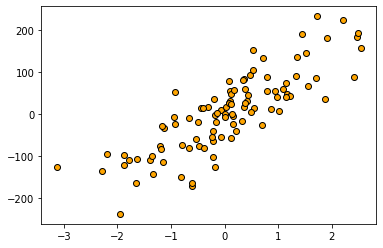

In [3]:
"""K最邻近算法用于回归分析"""
# 导入make_regression数据集生成器
from sklearn.datasets import make_regression
# 生成特征数量为1， 噪音为50的数据集
x, y = make_regression(n_features=1, n_informative=1, noise=50, random_state=8)
# 用散点图将数据进行可视化
plt.scatter(x,y,c='orange',edgecolors='k')
plt.show()

【**结果分析：**】横轴代表样本特征数值，范围大概是-3~3；纵轴代表样本的测定值，范围大致在：-250~250

下面使用K最邻近算法来进行回归分析：

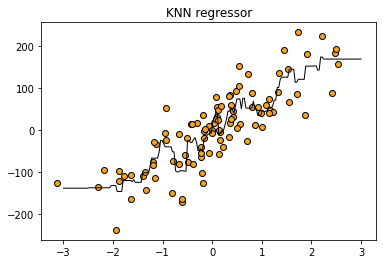

In [4]:
# 导入用于回归分析的KNN模型
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
# 用KNN模型拟合数据
reg.fit(x,y)
# 把预测结果用图像可视化
z = np.linspace(-3, 3, 200).reshape(-1,1)
plt.scatter(x,y ,c ='orange', edgecolors='k')
plt.plot(z,reg.predict(z), c='k', linewidth=1)
# 添加标题
plt.title('KNN regressor')
plt.show()

【**结果分析**】：上图的黑色曲线就代表K最邻近算法拟合 （make_regression）生成的数据所进行的模型。直观看，拟合程度并不是很好，有大量数据没有被模型覆盖到。

In [5]:
# 尝试给模型评分
print('\n\n\n')
print('代码运行结果：')
print('============================')
print('模型正确率：{:.2f}'.format(reg.score(x,y)))
print('============================')
print('\n\n\n')





代码运行结果：
模型正确率：0.77






【**结果分析**】模型得分只有7.7分，结果并不好。为了提高分数，我们将k最邻近算法进行调整。由于在默认情况下n_neighbors为5，我们尝试将它减少。

D:\soft\Anaconda3\envs\study_ai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


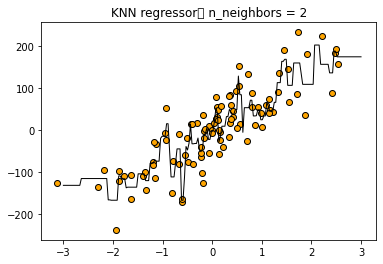

In [6]:
# 输入代码如下：
from sklearn.neighbors import KNeighborsRegressor
# 减少模型的n_neighbors参数为2
reg2 = KNeighborsRegressor(n_neighbors=2)
reg2.fit(x,y)
# 重新可视化
plt.scatter(x,y ,c ='orange', edgecolors='k')
plt.plot(z,reg2.predict(z), c='k', linewidth=1)
# 添加标题
plt.title('KNN regressor： n_neighbors = 2')
plt.show()

In [7]:
# 尝试给模型评分
print('\n\n\n')
print('代码运行结果：')
print('============================')
print('模型正确率：{:.2f}'.format(reg2.score(x,y)))
print('============================')
print('\n\n\n')





代码运行结果：
模型正确率：0.86






【**结果分析**】模型评分从0.77 提升到 0.86。 以上都是基于虚构的数据所进行的实验，接下来我么用真实数据集来进行K最邻近算法的实战。

### 3.3 K最邻近算法项目实战——酒的分类

#### 3.1 对数据集进行分析

In [8]:
# 首先，把酒的数据集加载到项目中
from sklearn.datasets import load_wine
# 从 sklearn 的datasets模块载入数据集
wine_dataset = load_wine()
# 此数据集实际上是一种Bunch对象，包括键和数值，下面检查下就数据集有哪些键：

In [9]:
# 打印酒数据集中的键
print('\n\n\n')
print('代码运行结果：')
print('============================')
print('红酒数据集中的键：\n{}'.format(wine_dataset.keys()))
print('============================')
print('\n\n\n')





代码运行结果：
红酒数据集中的键：
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])






【结果分析】从结果中看，酒数据集中包括数据data，目标分类target，目标分类名称target_names, 数据描述DESCR，以及特征变量的名称“features_names"
那么这个数据集中有多少样本？多少变量（features）呢？

In [10]:
# 使用.shape来打印数据的概况
print('\n\n\n')
print('代码运行结果：')
print('============================')
print('数据概况：\n{}'.format(wine_dataset['data'].shape))
print('============================')
print('\n\n\n')





代码运行结果：
数据概况：
(178, 13)






【结果分析】从上可以看出，酒数据集共有178个样本，每条数据有13个特征变量。更多信息可以用DESCR键来获得：

In [11]:
# 打印酒的数据集中的简短描述
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### 3.3.2 生成训练数据集和测试数据集

In [12]:
# 导入拆分数据集工具
from sklearn.model_selection import train_test_split
# 将数据集拆分为训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)
# 固定random_state的参数值为了让在同个项目中，多次生成的伪随机数相同。
# 是哪个这个值设为0或者保持缺省的时候，则每次生成的伪随机数均不同。

In [13]:
# 查看train_test_spilt函数拆分后数据集情况：
print('\n\n\n')
print('代码运行结果：')
print('============================\n')
# 打印训练数据集中特征向量的形态：
print('X_train shape:{}'.format(X_train.shape))
# 打印测试数据集中特征向量的形态：
print('X_test shape:{}'.format(X_test.shape))
# 打印训练数据集中目标的形态
print('y_train shape:{}'.format(y_train.shape))
# 打印测试数据集中目标的形态
print('y_test shape:{}'.format(y_test.shape))
print('\n============================')
print('\n\n\n')





代码运行结果：

X_train shape:(133, 13)
X_test shape:(45, 13)
y_train shape:(133,)
y_test shape:(45,)







【结果分析】此时可以看到在训练数据集中，样本X数量和其对应的标签y数量均为133个，约占样本总量的74.7%，而测试数据集中的X数量和标签Y数量均为45个，约占总的25.3%。同时，不论在训练集还是测试集中，特征变量都是13个。

#### 3.3.3 使用K最近邻算法进行建模

In [14]:
# 导入KNN分类模型
from sklearn.neighbors import KNeighborsClassifier
# 指定模型的n_neighbors参数值为1
knn = KNeighborsClassifier(n_neighbors = 1)  # knn为创建的对象，n_neighbors参数为近邻数量

In [15]:
# 使用knn对象“拟合”的方法来进行建模
# 依据是 训练数据集中的样本数据X_train和其对应的标签y_trian
print('\n\n\n')
print('代码运行结果：')
print('============================\n')
# 用模型对数据进行拟合
knn.fit(X_train, y_train)
print(knn)
print('\n============================')
print('\n\n\n')
knn.fit(X_train, y_train)






代码运行结果：

KNeighborsClassifier(n_neighbors=1)







KNeighborsClassifier(n_neighbors=1)

【结果分析】knn拟合的方法把自身作为结果返回，从结果中可看出模型的全部参数设定。除了n_neighbors = 1之外，其余参数都保持默认值即可。

#### 3.3.4 使用模型对新样本的分类进行预测|

In [16]:
# 下面我们使用模型对测试数据集进行分类，然后和测试数据集的样本实际分类进行对比，看吻合度多高，满分是1.0分
print('\n\n\n')
print('代码运行结果：')
print('============================\n')
# 打印模型的得分
print('测试数据集得分：{:.2f}'.format(knn.score(X_test, y_test)))
print('\n============================')
print('\n\n\n')






代码运行结果：

测试数据集得分：0.76







In [17]:
"""用建好的模型对新酒进行分类预测"""
import numpy as np
# 输入新的数据点
X_new = np.array([[13.2, 2.77, 2.51, 18.5, 96.6, 1.04, 2.55, 0.57, 1.47, 6.2, 1.05, 3.33, 820]])
# 使用.predict进行预测
prediction = knn.predict(X_new)
print('\n\n\n')
print('代码运行结果：')
print('============================\n')
print('测试新红酒的分类为：{}'.format(wine_dataset['target_names'][prediction]))
print('\n============================')
print('\n\n\n')






代码运行结果：

测试新红酒的分类为：['class_2']







【结果分析】模型把新酒的分类预测为class_2,虽然准确率只有76% ，但对我们第一个机器学习的实战来说，还是很不错的哦~~

#### 3.4 小结
1. 介绍了K最近邻算法的原理和使用方法，包括K最近邻分类和K最近邻回归，并且使用K最近邻算法帮助小C对酒的分类进行分析；
2. 不过，对于13维的数据集来说，K最近邻算法的表现，不是很优异。这是K最近邻算法的一大软肋
3. K最邻近算法是非常经典且十分易理解的算法，可以帮助理解其他算法模型；
4. 缺点：需要对数据集认真预处理、对超大规模的数据集拟合时间过长、对高维数据集拟合欠差、对于稀疏数据集束手无策等。
5. 接下来学习 经典且在高维度数据集中表现良好的算法——广义线性模型